<a href="https://colab.research.google.com/github/sauravkumar19/Text_to_word/blob/main/NRT_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python

In [113]:
import cv2
import os
import numpy as np
import random

# Define the output directory where you'll save the generated images and labels.
output_dir = "synthetic_data_with_orientation"
os.makedirs(output_dir, exist_ok=True)

# Define a dictionary mapping number words to numerical values.
number_dict = {
    'zero':0,'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10,
    'eleven': 11, 'twelve': 12, 'thirteen': 13, 'fourteen': 14, 'fifteen': 15,
    'sixteen': 16, 'seventeen': 17, 'eighteen': 18, 'nineteen': 19, 'twenty': 20,
    'twenty-one': 21, 'twenty-two': 22, 'twenty-three': 23, 'twenty-four': 24, 'twenty-five': 25,
    'twenty-six': 26, 'twenty-seven': 27, 'twenty-eight': 28, 'twenty-nine': 29, 'thirty': 30,
    'thirty-one': 31, 'thirty-two': 32, 'thirty-three': 33, 'thirty-four': 34, 'thirty-five': 35,
    'thirty-six': 36, 'thirty-seven': 37, 'thirty-eight': 38, 'thirty-nine': 39, 'forty': 40,
    'forty-one': 41, 'forty-two': 42, 'forty-three': 43, 'forty-four': 44, 'forty-five': 45,
    'forty-six': 46, 'forty-seven': 47, 'forty-eight': 48, 'forty-nine': 49, 'fifty': 50,
    'fifty-one': 51, 'fifty-two': 52, 'fifty-three': 53, 'fifty-four': 54, 'fifty-five': 55,
    'fifty-six': 56, 'fifty-seven': 57, 'fifty-eight': 58, 'fifty-nine': 59, 'sixty': 60,
    'sixty-one': 61, 'sixty-two': 62, 'sixty-three': 63, 'sixty-four': 64, 'sixty-five': 65,
    'sixty-six': 66, 'sixty-seven': 67, 'sixty-eight': 68, 'sixty-nine': 69, 'seventy': 70,
    'seventy-one': 71, 'seventy-two': 72, 'seventy-three': 73, 'seventy-four': 74, 'seventy-five': 75,
    'seventy-six': 76, 'seventy-seven': 77, 'seventy-eight': 78, 'seventy-nine': 79, 'eighty': 80,
    'eighty-one': 81, 'eighty-two': 82, 'eighty-three': 83, 'eighty-four': 84, 'eighty-five': 85,
    'eighty-six': 86, 'eighty-seven': 87, 'eighty-eight': 88, 'eighty-nine': 89, 'ninety': 90,
    'ninety-one': 91, 'ninety-two': 92, 'ninety-three': 93, 'ninety-four': 94, 'ninety-five': 95,
    'ninety-six': 96, 'ninety-seven': 97, 'ninety-eight': 98, 'ninety-nine': 99, 'hundred': 100
}

# Define a list of possible text orientations.
text_orientations = ['normal', 'UPPERCASE', 'MixedCase', 'miXedCaSe', 'rAnDoM CaSe']

# Set the desired number of data points.
num_data_points = 100000

for i in range(num_data_points):
    # Choose a random number word.
    word = random.choice(list(number_dict.keys()))

    # Get the corresponding numerical value from the dictionary.
    label = number_dict[word]

    # Choose a random text orientation.
    orientation = random.choice(text_orientations)

    # Create a blank image with a white background.
    image = np.ones((100, 200, 3), dtype=np.uint8) * 255
    cv2.rectangle(image, (0, 0), (200, 100), (255, 255, 255), -1)  # White background

    # Choose a random color for the text.
    text_color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

    # Define the font and text size.
    font = cv2.FONT_HERSHEY_SIMPLEX
    base_font_scale = 1.5
    font_thickness = 2
    spacing = int(200/(len(word)*1.5))
    new_x = 10
    new_y = 50

    # Apply the selected text orientation
    if orientation == 'UPPERCASE':
        word = word.upper()
    elif orientation == 'MixedCase':
        word = word.title()
    elif orientation == 'miXedCaSe':
        word = ''.join([c.upper() if i % 2 == 0 else c.lower() for i, c in enumerate(word)])
    elif orientation == 'rAnDoM CaSe':
        word = ''.join([c.upper() if random.choice([True, False]) else c.lower() for c in word])

    # Calculate the position to center the text.
    text_size = cv2.getTextSize(word, font, base_font_scale, font_thickness)[0]
    x = (image.shape[1] - text_size[0]) // 2
    y = (image.shape[0] + text_size[1]) // 2

    # Generate a random angle for text rotation (in degrees)
    rotation_angle = random.randint(0,360)

     # Generate random scaling factors for each character in the word
    char_scales = [random.uniform(0.6, 1.4) for _ in word]

    # Generate random spacing between words
    word_spacing = random.randint(0,3)  # Adjust as needed

    for char, char_scale in zip(word, char_scales):
        char_font_scale = base_font_scale * char_scale
        char_size = cv2.getTextSize(char, font, char_font_scale, font_thickness)[0]


        # Draw the rotated character on the image
        cv2.putText(image, char, (new_x, new_y), font, char_font_scale, text_color, font_thickness, lineType=cv2.LINE_AA)

        # Add spacing between characters within the word
        new_x = new_x + spacing+word_spacing

    center = (x + text_size[0] // 2, y - text_size[1] // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1)

    # Rotate the blank image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (100, 200))



    # Save the image.
    image_filename = os.path.join(output_dir, f"{i}.png")
    cv2.imwrite(image_filename, image)

    # Create a label file (e.g., a text file) with the corresponding label.
    label_filename = os.path.join(output_dir, f"{i}.txt")
    with open(label_filename, "w") as label_file:
        label_file.write(str(label))

print(f"Generated {num_data_points} synthetic images with orientation and labels in the '{output_dir}' directory.")


Generated 100000 synthetic images with orientation and labels in the 'synthetic_data_with_orientation' directory.


In [25]:
word

'fIFtY-eIght'

In [130]:
# Import necessary libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from sklearn.metrics import accuracy_score, classification_report

In [131]:


# Define the path to the directory containing the synthetic data and labels
data_dir = "synthetic_data_with_orientation"

# Initialize empty lists to store images and corresponding labels
images = []
labels = []

# Loop through the image files in the data directory
for filename in os.listdir(data_dir):
    if filename.endswith(".png"):
        # Load and preprocess the image
        image = cv2.imread(os.path.join(data_dir, filename), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (28, 28))  # Resize the image to a common size (adjust as needed)

        # Extract the label from the corresponding label file
        label_filename = os.path.splitext(filename)[0] + ".txt"
        label_filepath = os.path.join(data_dir, label_filename)
        with open(label_filepath, "r") as label_file:
            label = int(label_file.read().strip())

        # Append the image and label to the lists
        images.append(image)
        labels.append(label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)



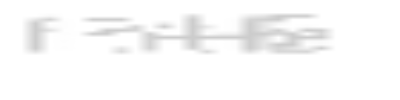

In [132]:
cv2_imshow(cv2.resize(images[1],(400,100)))

In [133]:
labels[0]

23

In [134]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize pixel values to a range of [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(101, activation='softmax')  # 101 classes (0 to 100)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Reshape the input data to include the number of color channels (1 for grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Train the model
model.fit(X_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))







Epoch 1/10
2250/2250 [==============================] - 111s 49ms/step - loss: 2.1041 - accuracy: 0.4806 - val_loss: 0.5377 - val_accuracy: 0.8440
Epoch 2/10
2250/2250 [==============================] - 107s 47ms/step - loss: 0.3348 - accuracy: 0.9065 - val_loss: 0.2477 - val_accuracy: 0.9226
Epoch 3/10
2250/2250 [==============================] - 110s 49ms/step - loss: 0.1563 - accuracy: 0.9588 - val_loss: 0.1601 - val_accuracy: 0.9549
Epoch 4/10
2250/2250 [==============================] - 105s 47ms/step - loss: 0.1020 - accuracy: 0.9728 - val_loss: 0.0976 - val_accuracy: 0.9732
Epoch 5/10
2250/2250 [==============================] - 107s 47ms/step - loss: 0.0735 - accuracy: 0.9804 - val_loss: 0.1064 - val_accuracy: 0.9722
Epoch 6/10
2250/2250 [==============================] - 111s 49ms/step - loss: 0.0555 - accuracy: 0.9854 - val_loss: 0.0512 - val_accuracy: 0.9874
Epoch 7/10
2250/2250 [==============================] - 104s 46ms/step - loss: 0.0442 - accuracy: 0.9887 - val_loss: 0

In [158]:
a = cv2.imread('/content/drive/MyDrive/ProjectA/IMG20230917122900 (1).jpg', cv2.IMREAD_GRAYSCALE)
a = image = cv2.resize(image, (28, 28))

In [159]:
cv2_imshow(a)

In [160]:
a = a/255.0

In [161]:
a = a.reshape(-1, 28, 28, 1)

In [162]:
predictions = model.predict(a)

1/1 [==============================] - 0s 34ms/step


In [163]:
y_pred = np.argmax(predictions, axis=1)

In [164]:
y_pred

array([91])